# Machine algorithm for checking the wine type whether red wine or white wine

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import plotly.graph_objs as go
from sklearn import tree

In [2]:
#Reading the dataset
df=pd.read_excel('E:\lakshmi\DS\winequalityN.xlsx')

In [3]:
print(df.shape)
df.head(10)

(6497, 13)


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

In [5]:
split=df.head(10)
split

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

In [4]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.220172     0.323736   
volatile acidity           0.220172          1.000000    -0.378061   
citric acid                0.323736         -0.378061     1.000000   
residual sugar            -0.112319         -0.196702     0.142486   
chlorides                  0.298421          0.377167     0.039315   
free sulfur dioxide       -0.283317         -0.353230     0.133437   
total sulfur dioxide      -0.329747         -0.414928     0.195218   
density                    0.459204          0.271193     0.096320   
pH                        -0.251814          0.260660    -0.328689   
sulphates                  0.300380          0.225476     0.057613   
alcohol                   -0.095603         -0.038248    -0.010433   
quality                   -0.077031         -0.265953     0.085706   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.112319   0.298421            -0.283317   
volatile acidity           -0.196702   0.377167            -0.353230   
citric acid                 0.142486   0.039315             0.133437   
residual sugar              1.000000  -0.128902             0.403439   
chlorides                  -0.128902   1.000000            -0.195042   
free sulfur dioxide         0.403439  -0.195042             1.000000   
total sulfur dioxide        0.495820  -0.279580             0.720934   
density                     0.552498   0.362594             0.025717   
pH                         -0.267050   0.044806            -0.145191   
sulphates                  -0.185745   0.395332            -0.188489   
alcohol                    -0.359706  -0.256861            -0.179838   
quality                    -0.036825  -0.200886             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329747  0.459204 -0.251814   0.300380   
volatile acidity                 -0.414928  0.271193  0.260660   0.225476   
citric acid                       0.195218  0.096320 -0.328689   0.057613   
residual sugar                    0.495820  0.552498 -0.267050  -0.185745   
chlorides                        -0.279580  0.362594  0.044806   0.395332   
free sulfur dioxide               0.720934  0.025717 -0.145191  -0.188489   
total sulfur dioxide              1.000000  0.032395 -0.237687  -0.275381   
density                           0.032395  1.000000  0.011920   0.259454   
pH                               -0.237687  0.011920  1.000000   0.191248   
sulphates                        -0.275381  0.259454  0.191248   1.000000   
alcohol                          -0.265740 -0.686745  0.121002  -0.003261   
quality                          -0.041385 -0.305858  0.019366   0.038729   

                       alcohol   quality  
fixed acidity        -0.095603 -0.077031  
volatile acidity     -0.038248 -0.265953  
citric acid          -0.010433  0.085706  
residual sugar       -0.359706 -0.036825  
chlorides            -0.256861 -0.200886  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121002  0.019366  
sulphates            -0.003261  0.038729  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

<AxesSubplot:>

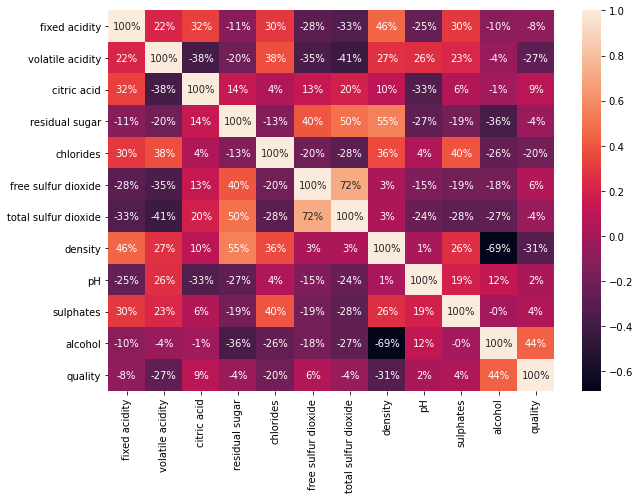

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

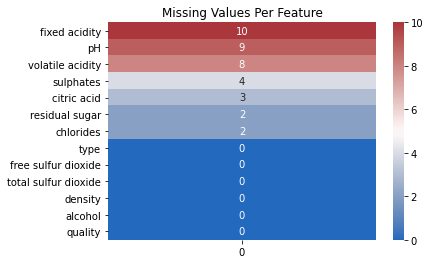

In [8]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

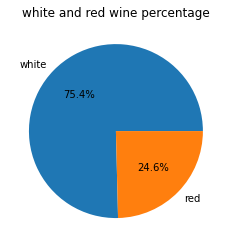

In [9]:
#Checking white wine and red wine
wine_white=sum(df['type']=='white')
wine_red=sum(df['type']=='red')
wine=[wine_white,wine_red]
wine_tye=['white','red']
plt.pie(wine,labels=wine_tye,autopct='%2.1f%%')
plt.title('white and red wine percentage')
plt.show()

In [10]:
#Filling missing values with mean
df['fixed acidity'].fillna(value=df['fixed acidity'].median(),inplace=True)
df['volatile acidity'].fillna(value=df['volatile acidity'].median(),inplace=True)
df['citric acid'].fillna(value=df['citric acid'].median(),inplace=True)
df['residual sugar'].fillna(value=df['residual sugar'].median(),inplace=True)
df['pH'].fillna(value=df['pH'].median(),inplace=True)
df['sulphates'].fillna(value=df['sulphates'].median(),inplace=True)
df['chlorides'].fillna(value=df['chlorides'].median(),inplace=True)

In [12]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df['type'].replace({'white':0,'red':1},inplace=True)

In [14]:
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.0             0.270         0.36            20.7   
1        0            6.3             0.300         0.34             1.6   
2        0            8.1             0.280         0.40             6.9   
3        0            7.2             0.230         0.32             8.5   
4        0            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     1            6.2             0.600         0.08             2.0   
6493     1            5.9             0.550         0.10             2.2   
6494     1            6.3             0.510         0.13             2.3   
6495     1            5.9             0.645         0.12             2.0   
6496     1            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493       0.51     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

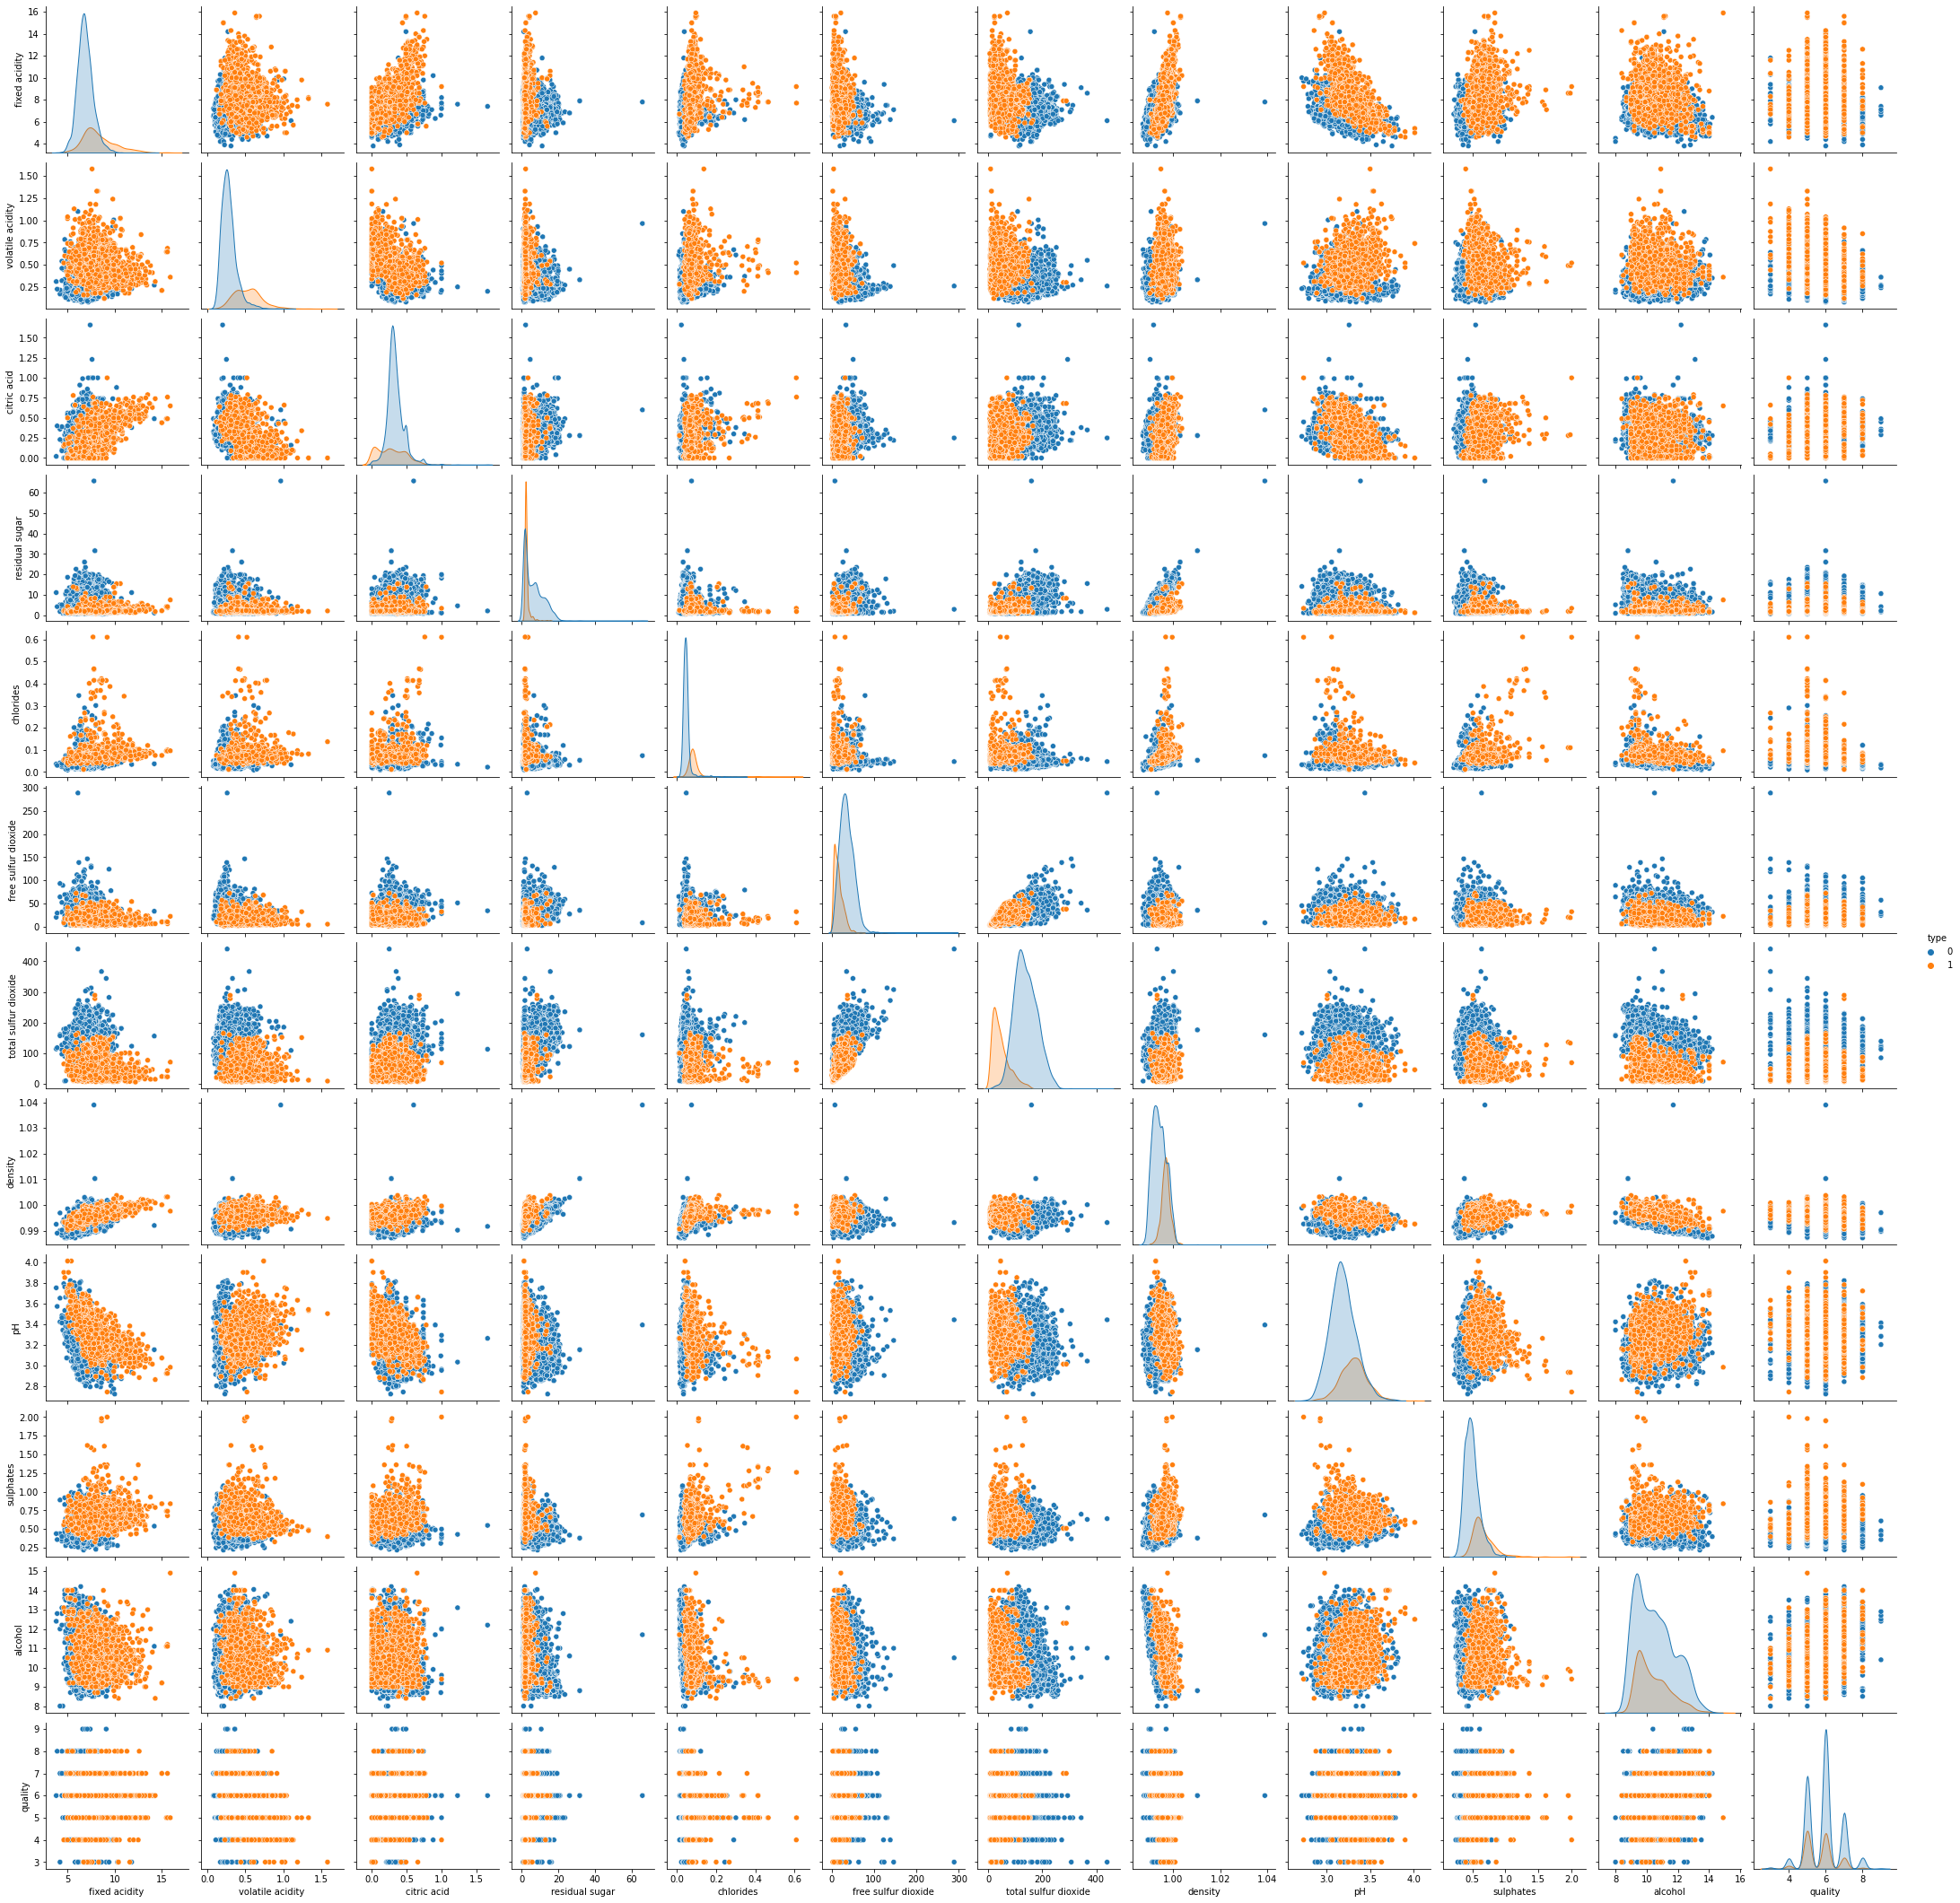

In [15]:
sns.pairplot(df,hue='type')

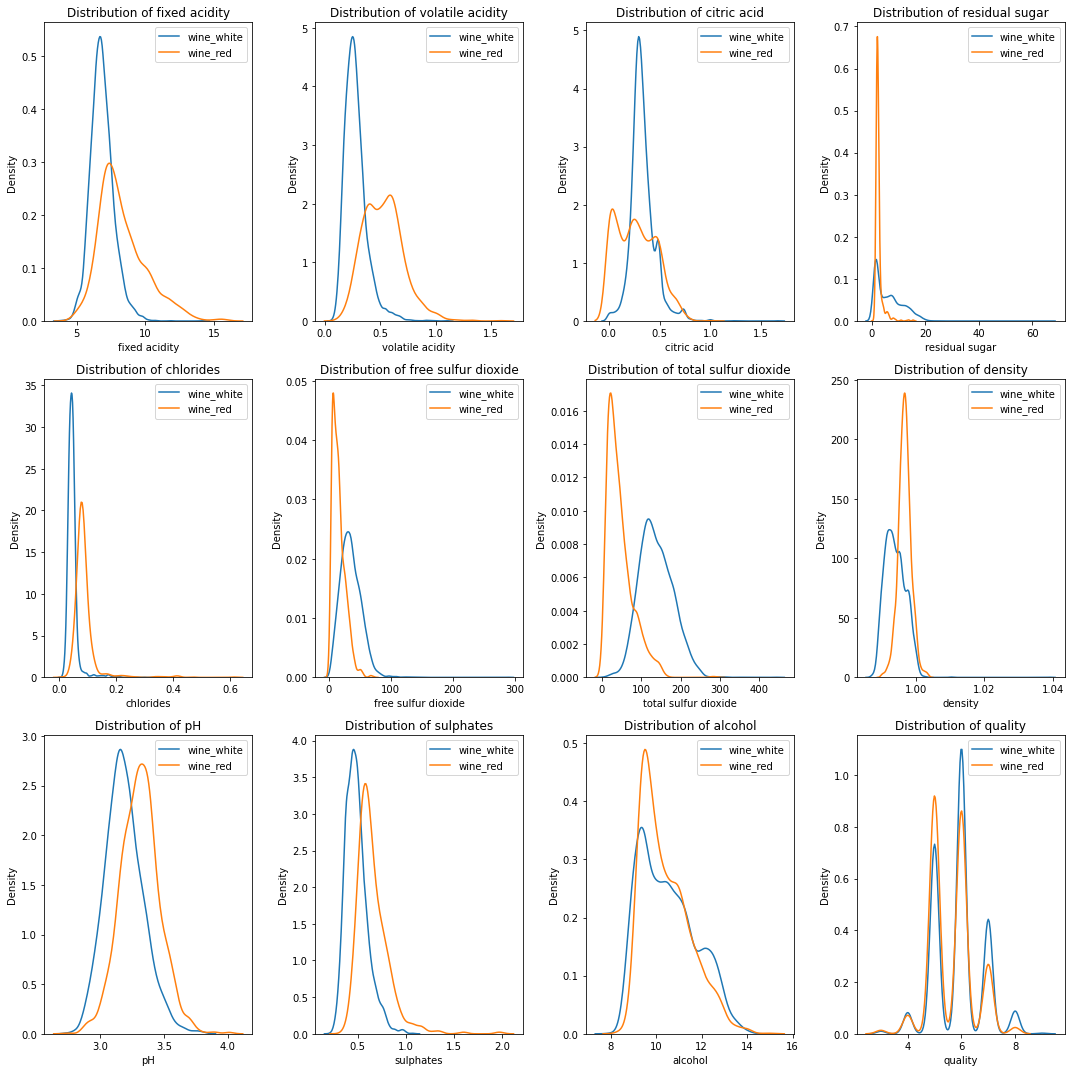

In [16]:
#Normal distribution for each column
wine_white= df.query('type == 0')
wine_red= df.query('type == 1')
plt.figure(figsize=(15,15))
for ax,col in enumerate(df.columns[1:13]):
    plt.subplot(3,4,ax+1)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x=wine_white[col],label='wine_white')
    sns.kdeplot(x=wine_red[col],label='wine_red')
    plt.legend(prop=dict(size=10))
plt.tight_layout()

In [17]:
#T-test for the columns
ttest_results_pvalues,ttest_results_statistic = [],[]
for ax,col in enumerate(df.columns[1:13]):
    statistic,pvalue = ttest_ind(wine_white[col],wine_red[col])
    ttest_results_pvalues.append(pvalue)
    ttest_results_statistic.append(statistic)
    
ttest_res_df = pd.DataFrame({'S':ttest_results_statistic,'P':ttest_results_pvalues,'F':df.columns[1:13]})
ttest_res_df = ttest_res_df.sort_values(by='P')

In [18]:
#T-test visualization
tr  = go.Bar(x=ttest_res_df['F'] ,y=ttest_res_df['P'] ,name='T-test P Value')
tr2 = go.Bar(x=ttest_res_df['F'] ,y=ttest_res_df['S'] ,name='T-test F Statistic')

data = [tr2]
fig = go.Figure(data=data,layout={'title':'T-test Results For Each Feature in Our Dataset','barmode':'overlay'})
fig.show()

In [19]:
ttest_results_pvalues

[0.0,
 0.0,
 2.996990182628051e-52,
 2.5564273134024193e-185,
 0.0,
 0.0,
 0.0,
 7.319604639974869e-236,
 2.565430605848378e-163,
 0.0,
 0.00786787399629255,
 4.888069044201508e-22]

Text(0.5, 1.0, 'fixed acidity vs density')

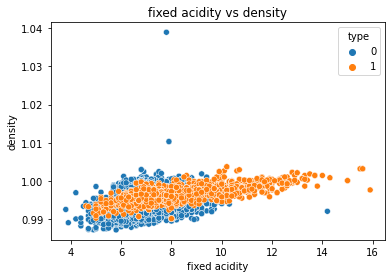

In [20]:
#Fixed acidity and density plotting
sns.scatterplot(data=df,x='fixed acidity',y='density',hue='type')
plt.title('fixed acidity vs density')

Text(0.5, 1.0, 'fixed acidity vs density')

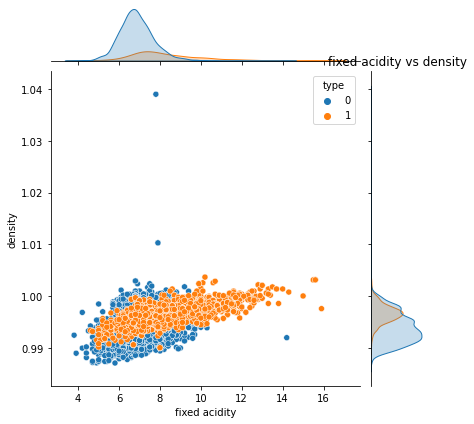

In [21]:
sns.jointplot(data=df,x='fixed acidity',y='density',hue='type')
plt.title('fixed acidity vs density')

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

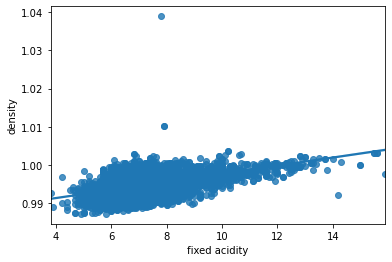

In [22]:
sns.regplot(data=df,x='fixed acidity',y='density')

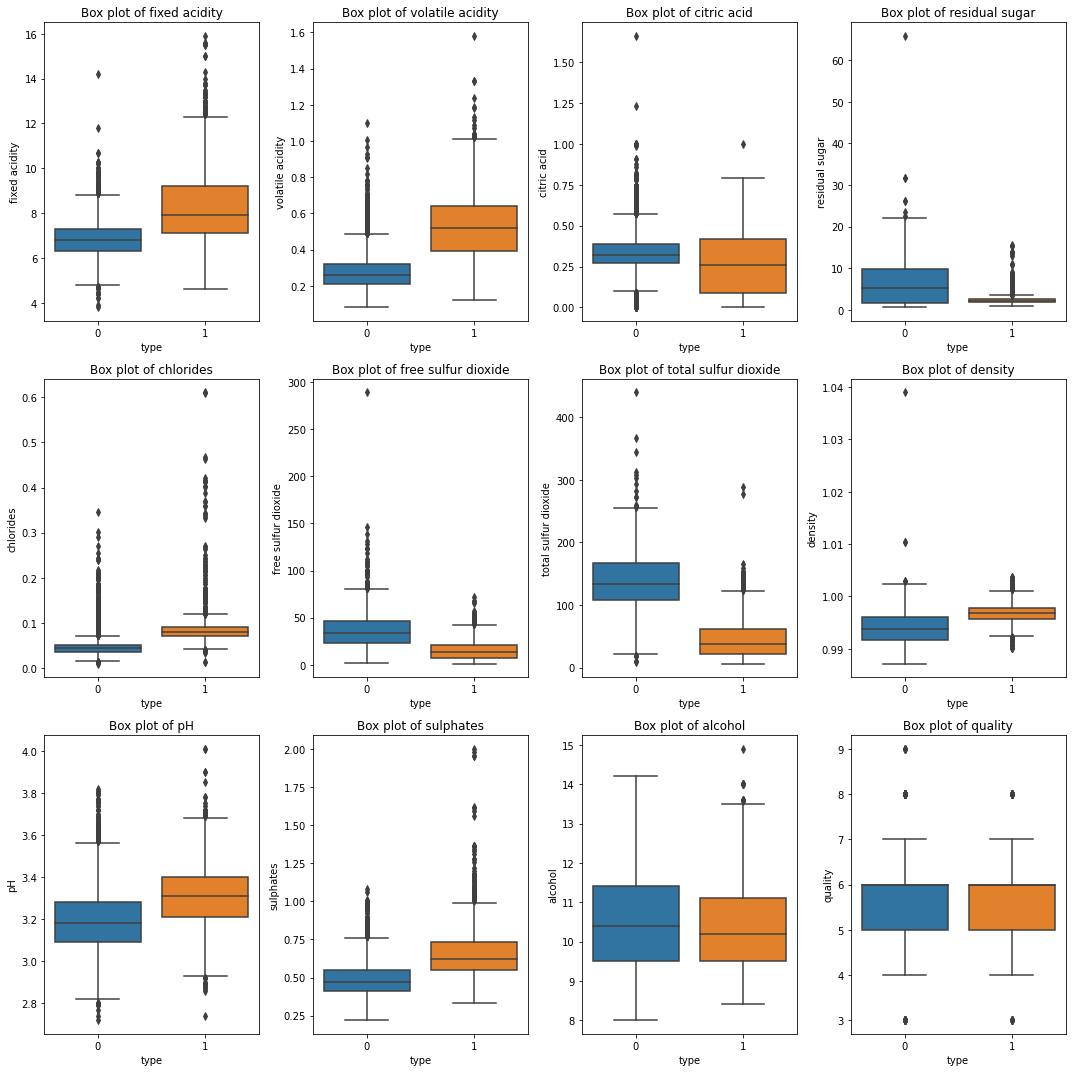

In [23]:
#Box plots for all columns in the dataset
plt.figure(figsize=(15,15))
for ax,col in enumerate(df.columns[1:13]):
    plt.subplot(3,4,ax+1)
    plt.title(f'Box plot of {col}')
    sns.boxplot(data=df,x='type',y=col)
plt.tight_layout()

In [12]:
#Splitting dataset
X=df.drop(['type'],axis=1)
y=df[['type']]

<ipython-input-25-a66dbba9306f>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[0.07415425 0.16731998 0.03802927 0.08366799 0.11764565 0.04193195
 0.23924949 0.10894753 0.03308186 0.06600267 0.02016001 0.00980936]


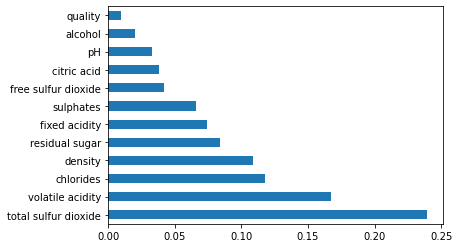

In [25]:
#Each and every column impact on the target variable
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [20]:
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
    #Standardization of the columns
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)
split=sd.transform(split)

# Decision tree algorithm

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred_dt = dt.predict(X_test)
train_acc=dt.score(X_test,y_test)
print('Training accuracy',train_acc)

Training accuracy 0.9830769230769231


In [11]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:",confusion_matrix(y_test, y_pred_dt))
print("Accuracy:",accuracy_score(y_test,y_pred_dt)*100)
result=accuracy_score(y_test,y_pred_dt)*100

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.98      0.96      0.97       314

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300

Confusion Matrix: [[979   7]
 [ 11 303]]
Accuracy: 98.61538461538461


In [34]:
fn=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
cn=['white','red']

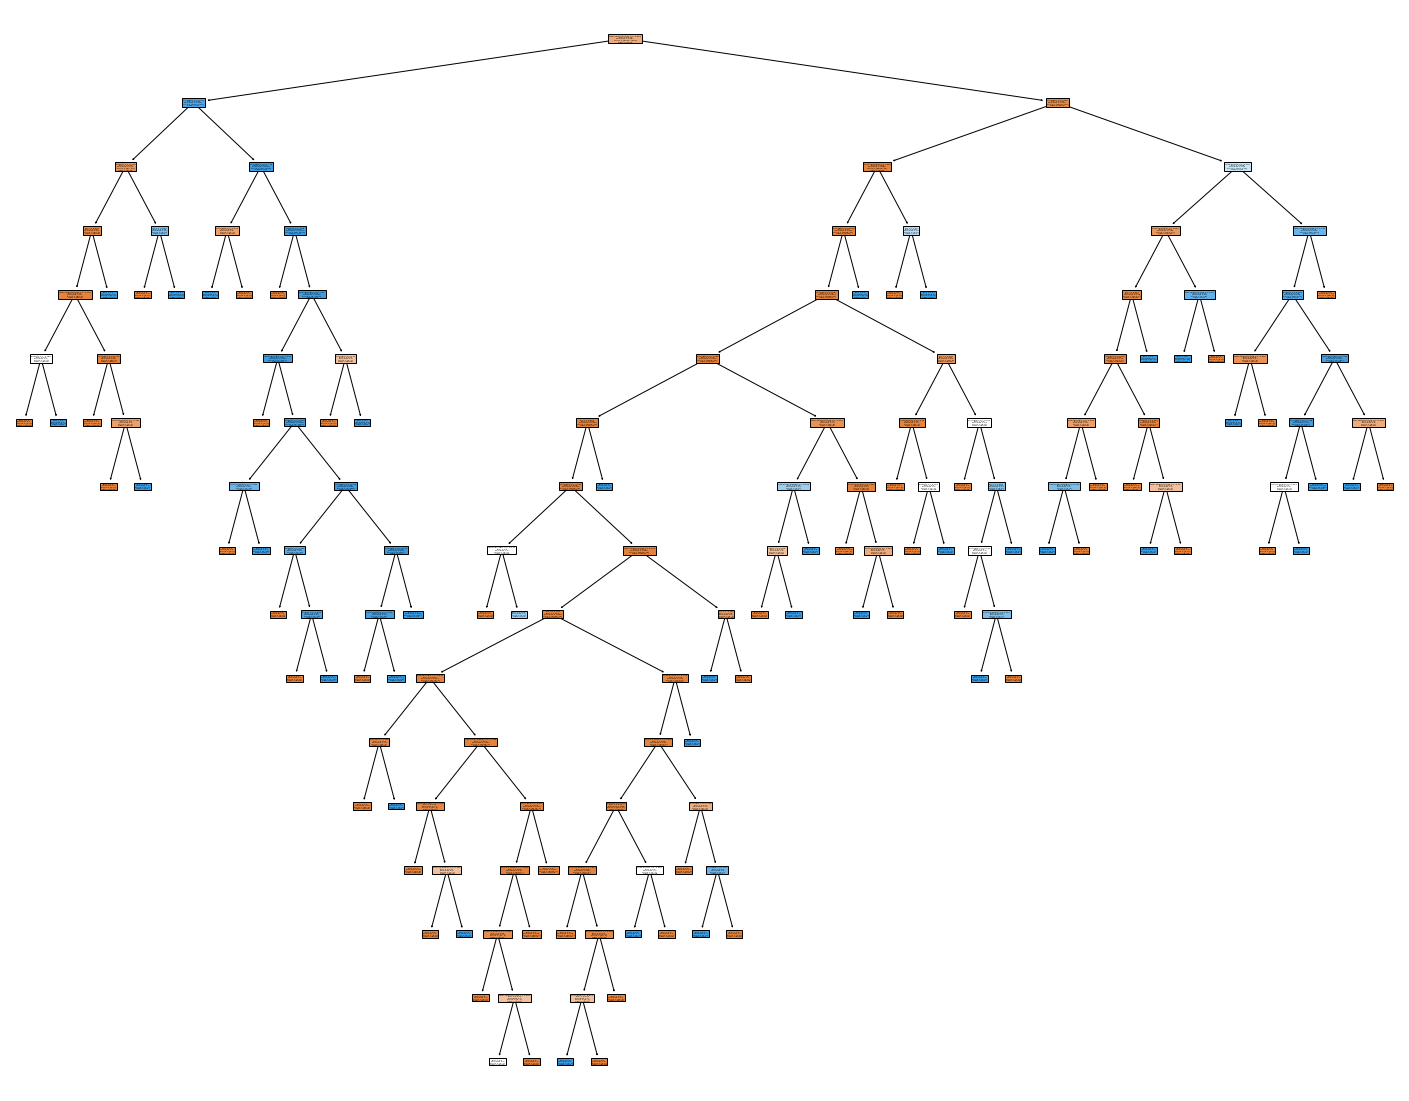

In [35]:
#Tree visualization
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=fn,class_names=cn,filled=True);

# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

<ipython-input-36-6affca082033>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_estimators=50)

In [37]:
y_pred_rf = classifier.predict(X_test)
train_acc2=classifier.score(X_test,y_test)
print('Training accuracy',train_acc2)

Training accuracy 0.9961538461538462


In [38]:
result = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_rf)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_rf)*100
print("Accuracy:",result2)

Confusion Matrix:
[[986   0]
 [  5 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       986
           1       1.00      0.98      0.99       314

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300

Accuracy: 99.61538461538461


In [39]:
from sklearn.tree import export_graphviz

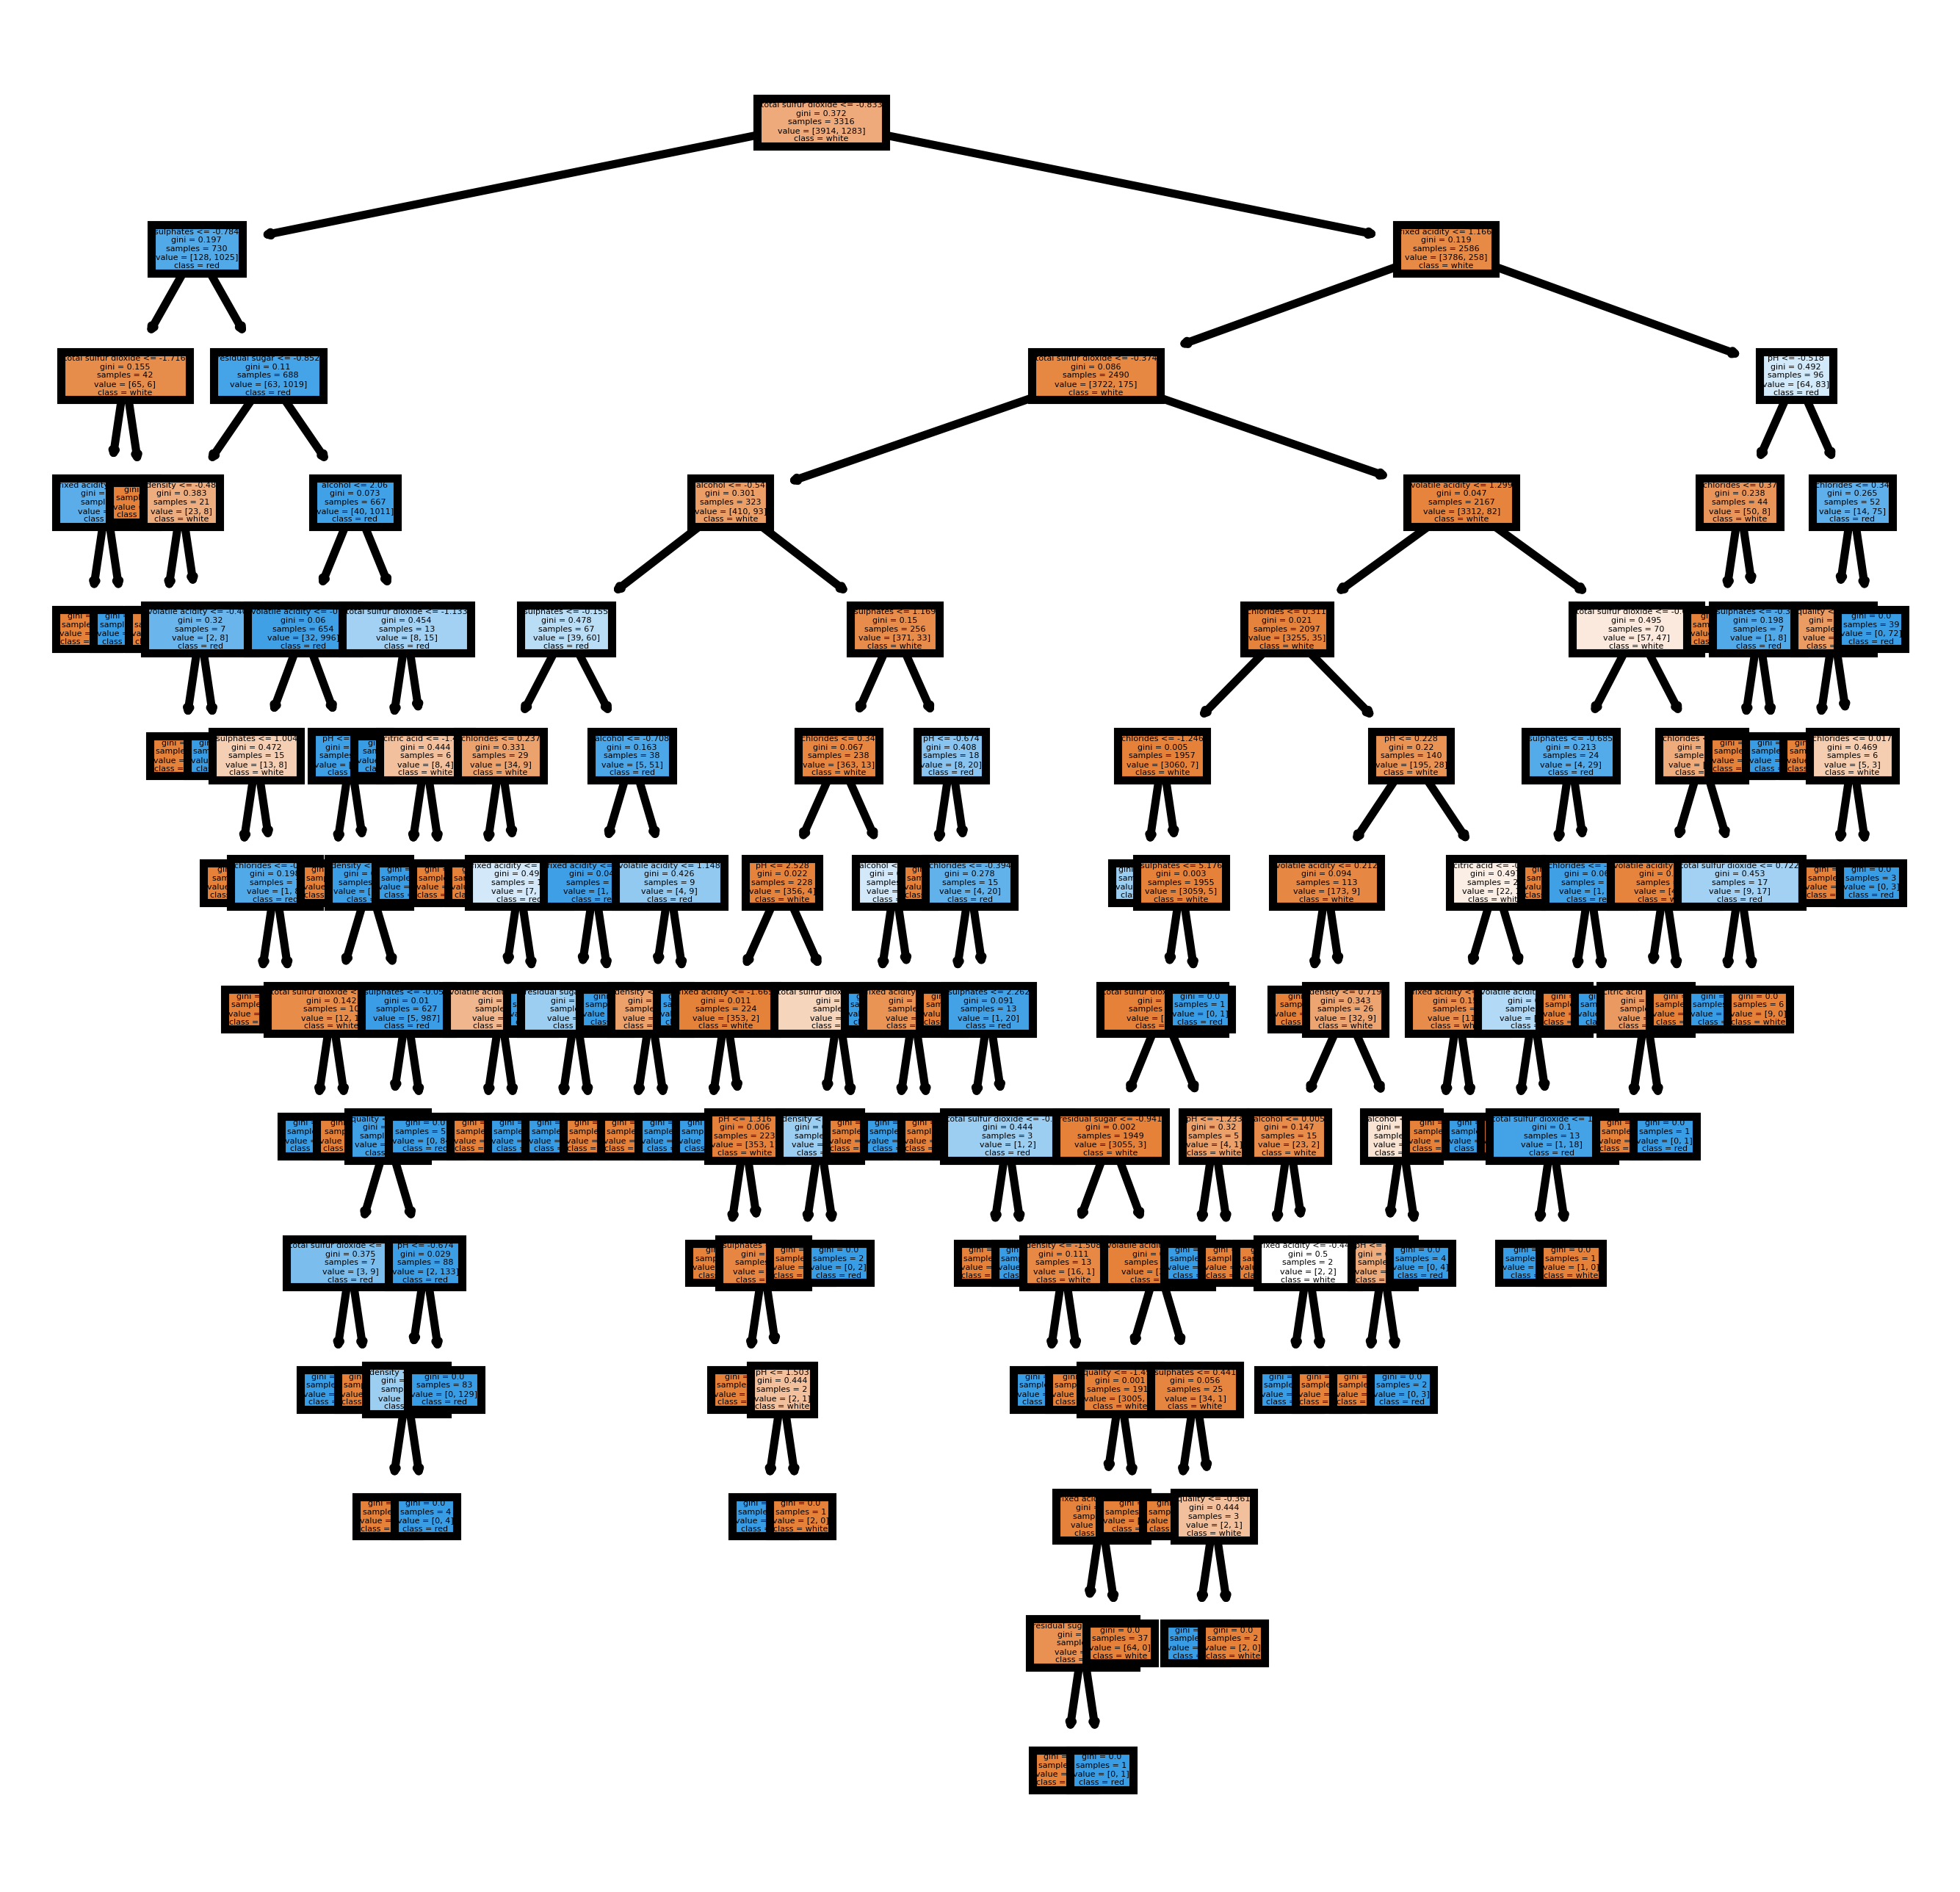

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

# Naive bayes algorithm

In [48]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [49]:
y_pred_nb=model.predict(X_test)
train_acc3=model.score(X_test,y_test)
print('Training accuracy',train_acc3)

Training accuracy 0.9723076923076923


In [50]:
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb)*100)
result4=accuracy_score(y_test,y_pred_nb)*100

[[967  19]
 [ 17 297]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.94      0.95      0.94       314

    accuracy                           0.97      1300
   macro avg       0.96      0.96      0.96      1300
weighted avg       0.97      0.97      0.97      1300

97.23076923076923


# K NearestNeighbour classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=7)

In [45]:
prediction_knn = knn.predict(X_test)
train_acc4=knn.score(X_test,y_test)
print('Training accuracy',train_acc4)

Training accuracy 0.9938461538461538


In [59]:
print(confusion_matrix(y_test,prediction_knn))
print(classification_report(y_test,prediction_knn))
print(accuracy_score(y_test,prediction_knn)*100)
result4=accuracy_score(y_test,prediction_knn)*100

[[982   4]
 [  4 310]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       0.99      0.99      0.99       314

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

99.38461538461539


In [47]:
error_rate = []
# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    t=1-accuracy_score(y_test,pred_i)
    error_rate.append(t)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Admin\anaconda3\lib\sit

Text(0, 0.5, 'Error Rate')

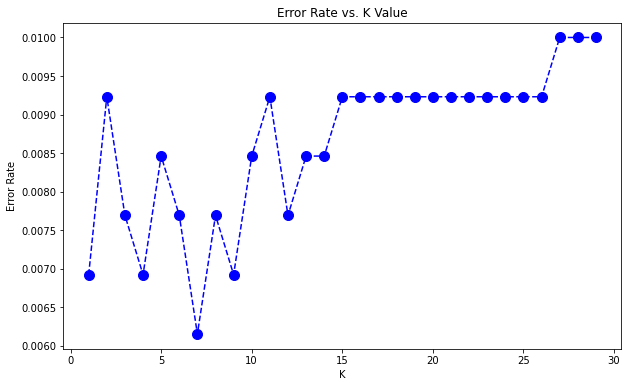

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# GradientBoostingClassifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingClassifier()

In [50]:
prediction_gbc = gbc.predict(X_test)
train_acc4=gbc.score(X_test,y_test)
print('Training accuracy',train_acc4)

Training accuracy 0.9961538461538462


In [60]:
print(confusion_matrix(y_test,prediction_gbc))
print(classification_report(y_test,prediction_gbc))
print(accuracy_score(y_test,prediction_gbc)*100)
result5=accuracy_score(y_test,prediction_gbc)*100

[[985   1]
 [  4 310]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      0.99      0.99       314

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300

99.61538461538461


# LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [53]:
prediction_log = log.predict(X_test)
train_acc5=log.score(X_test,y_test)
print('Training accuracy',train_acc5)

Training accuracy 0.99


In [69]:
print(confusion_matrix(y_test,prediction_log))
print(classification_report(y_test,prediction_log))
print(accuracy_score(y_test,prediction_log)*100)
result6=accuracy_score(y_test,prediction_log)*100

[[981   5]
 [  8 306]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.98      0.97      0.98       314

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300

99.0


In [70]:
models=pd.DataFrame({'Model': ['Desision Tree','Random Forest','Naive bayes','K-Nearest Neighbour',
                               'GradientBoosting','Logistic regression'], 'Accuracy':[result,result2,
                                result3,result4,result5,result6]})

In [71]:
models

Model   Accuracy
0        Desision Tree  98.461538
1        Random Forest  99.615385
2          Naive bayes  97.230769
3  K-Nearest Neighbour  99.384615
4     GradientBoosting  99.615385
5  Logistic regression  99.000000

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

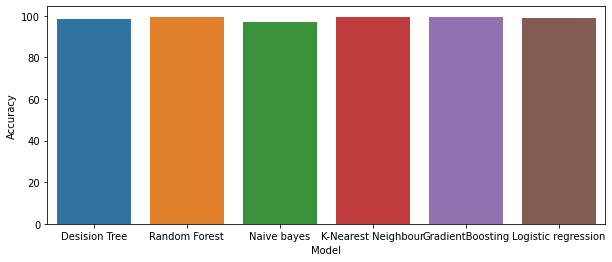

In [72]:
plt.figure(figsize=(10,4))
sns.barplot(models['Model'],models['Accuracy'])